<a href="https://colab.research.google.com/github/hyojunyee/kita_2404/blob/main/m8_VISION%20%EC%9D%91%EC%9A%A9/OCR/vision_10_NAVEROCR_1015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract -q

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,481 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [2]:
!sudo apt-get install tesseract-ocr-kor tesseract-ocr-jpn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-jpn tesseract-ocr-kor
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,442 kB of archives.
After this operation, 4,179 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-jpn all 1:4.00~git30-7274cfa-1.1 [1,390 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-kor all 1:4.00~git30-7274cfa-1.1 [1,052 kB]
Fetched 2,442 kB in 1s (2,872 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling ba

In [7]:
from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import matplotlib.pyplot as plt
import pytesseract
import imutils
import cv2
import re
import requests
import numpy as np

In [3]:
!pip install pdf2image -q
!apt-get install poppler-utils -q

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 0s (1,881 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123676 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


### 테서렉트를 사용해서 PDF파일 이미지 변환 후 OCR

#### 영어 PDF파일 OCR

In [5]:
# 영어파일 업로드
from google.colab import files
uploaded = files.upload()

Saving text_ko.pdf to text_ko.pdf


In [ ]:
# 코랩 환경에서의 poppler 위치를 명시적으로 설정. 이렇게 하면 pdf2image가 popler를 사용하여 PDF 파일의 페이지 수를 가져올 수 있음.
import os
os.environ['PATH'] += "/usr/bin"

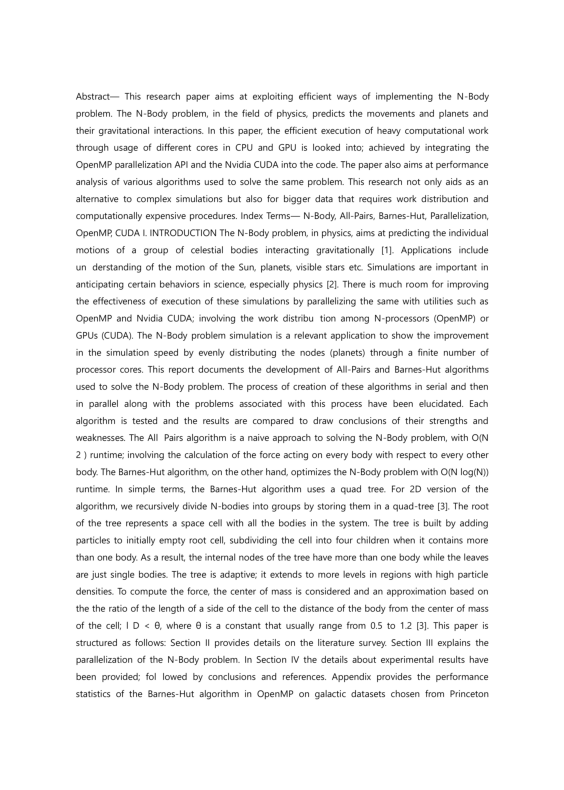

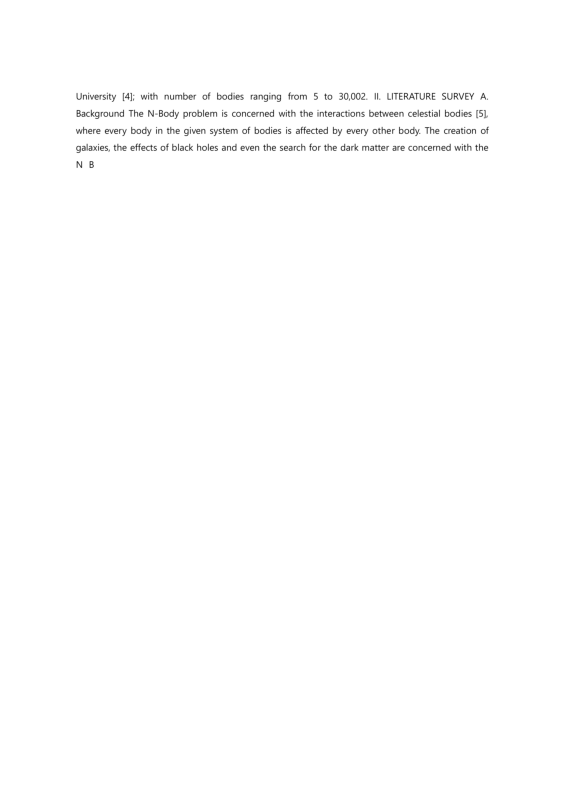

In [9]:
from pdf2image import convert_from_path
import os

# PDF 파일 경로 설정
pdf_path = '/content/text_eng.pdf'
# PDF를 이미지로 변환 (이 예시에서는 DPI를 300으로 설정)
img = convert_from_path(pdf_path, 300)

# 변환된 이미지를 화면에 출력
for i, image in enumerate(img):
    plt.figure(figsize=(16, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [10]:
import cv2
import pytesseract
from pdf2image import convert_from_path
from PIL import Image
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import os
import numpy as np

# PDF 파일을 이미지로 변환
pages = convert_from_path('/content/text_eng.pdf')

# 텍스트를 저장할 변수 초기화
text = ""

# 이미지를 그레이스케일로 변환하고 텍스트 추출
for idx, page in enumerate(pages):
    # 이미지를 그레이스케일로 변환
    gray = cv2.cvtColor(np.array(page), cv2.COLOR_RGB2GRAY)

    # 이미지를 파일로 저장하여 pytesseract로 텍스트 추출
    filename = "{}.jpg".format(idx)
    cv2.imwrite(filename, gray)
    text += pytesseract.image_to_string(Image.open(filename), lang='eng')
    os.remove(filename)

# 추출된 텍스트 출력
print(text)

Abstract— This research paper aims at exploiting efficient ways of implementing the N-Body
problem. The N-Body problem, in the field of physics, predicts the movements and planets and
their gravitational interactions. In this paper, the efficient execution of heavy computational work
through usage of different cores in CPU and GPU is looked into; achieved by integrating the
OpenMP parallelization API and the Nvidia CUDA into the code. The paper also aims at performance
analysis of various algorithms used to solve the same problem. This research not only aids as an
alternative to complex simulations but also for bigger data that requires work distribution and
computationally expensive procedures. Index Terms— N-Body, All-Pairs, Barnes-Hut, Parallelization,
OpenMP CUDA I. INTRODUCTION The N-Body problem, in physics, aims at predicting the individual
motions of a group of celestial bodies interacting gravitationally [1]. Applications include
un derstanding of the motion of the Sun, planet

#### 한글 PDF파일 OCR

In [ ]:
# 한글파일 업로드
from google.colab import files
uploaded = files.upload()

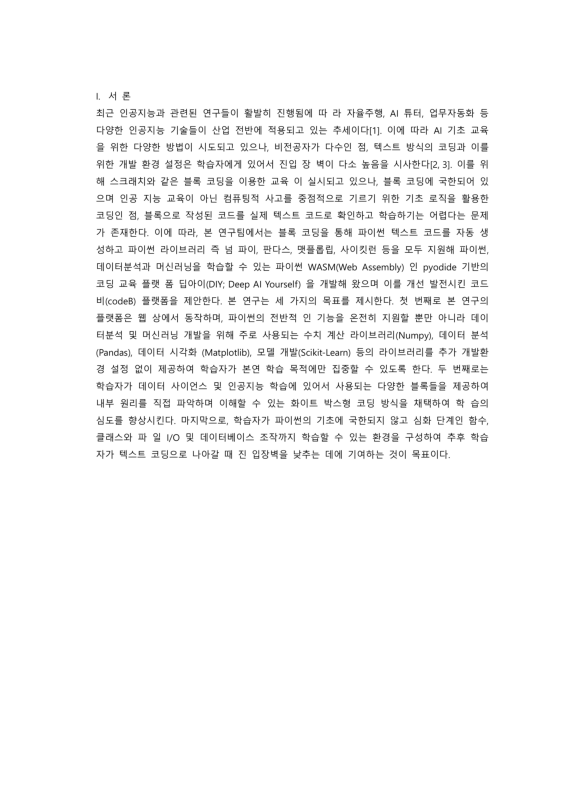

In [14]:
from pdf2image import convert_from_path
import os

# PDF 파일 경로 설정
pdf_path = '/content/text_ko.pdf'
# PDF를 이미지로 변환 (이 예시에서는 DPI를 300으로 설정)
img = convert_from_path(pdf_path, 300)

# 변환된 이미지를 화면에 출력
for i, image in enumerate(img):
    plt.figure(figsize=(16, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [13]:
import cv2
import pytesseract
from pdf2image import convert_from_path
from PIL import Image
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import os
import numpy as np

# PDF 파일을 이미지로 변환
pages = convert_from_path('/content/text_ko.pdf')

# 텍스트를 저장할 변수 초기화
text = ""

# 이미지를 그레이스케일로 변환하고 텍스트 추출
for idx, page in enumerate(pages):
    # 이미지를 그레이스케일로 변환
    gray = cv2.cvtColor(np.array(page), cv2.COLOR_RGB2GRAY)

    # 이미지를 파일로 저장하여 pytesseract로 텍스트 추출
    filename = "{}.jpg".format(idx)
    cv2.imwrite(filename, gray)
    text += pytesseract.image_to_string(Image.open(filename), lang='kor')
    os.remove(filename)

# 추출된 텍스트 출력
print(text)

서론

되고 있는 추세이다[1]. 이에 따라 시 기초 교육

반에 적용

업 전

[

|산

0

|

수
골

7

10

도

,

 

 

 

 

 

 

 

미하 6 160 대 게 외 이 비 이 ㅇㅇ 핏
ㅎ  0  증 귀  줍 패
ㅇ0ㅎ잃매06호펀떠따르패
더 ㅇ 꺼  브 < 브 2] 전 기 피
149 ~ 18 에 ㅁ 중 윙 < 퍼 그 흐
떠오대지포밸힌흥띠급ㅎㅋㅠ
ㅡ 엔 호   금 개 고 이
히금호멍으며 혼페돌히중
기 고 89 뷔  바 -, 펀 쿼 퀘 을
고. 10 근 = 피 = =  든
표주떠데토기머으5헨클
논서  중  수   크
비즈벼현6표에긍쁘 .해응
시웨피해금 00820 모×무
고   10  회 너 띠
피 00 수 = 호언 원
. 그 더호퍼 48므구오괴
팬뱃히띠공ㅁ×-이춘핀호
기 전여ㄷ5 휘궁오경 이 0 띠
토노  은 ㅎ > = 때 고
4므더떠0 흐호너에친
ㅁ흐보의때ㅠ쁘홍꼴화포즈
조고 주비비무발호오  8 드
또 고. 괜 20 더    히 -
0000 40 떠 쥐 삐  0" 울어 자
100 -ㅡ, ㅎㅇ  비  때 31] 6 .운.
00   메 -증 우씨
0 = 401 < | 오 8 수
또 다 애  지폐  곱 민권 버
고  더 더 혀  급 년 그 원 00
~ ~  6   1
구조외고혹졸리볼조보호직
2  ~ 3 그 ㅇ
이휴따따 게중흐엉호막왼패
여글으부띠패티제 8 ㅎ 빠
더중에균빅뜨꼬헨으피트중
법도 발고버으개씬층공표한
고 그  가 으 므
브 44 떠 종 뻐 피 ㅡ 이 므 고 에
히타 핀고므에오히비헤
흐미페으띠모떡교의
20 0 얘 턴 피 굽미  그 =
0 원않더뱀글호되래엔즈포
재 이 으 를 순 버 호 ㅁ
 00 공 0 베 으 도 주 호 20 고
@8 페월큐피고척려비비교 ㅁ
그 들  ㆍ 노 오 화  야
그 헨호매떼회리피앰호이매
힐주미어힌붕더포버공보
10 프 00 10 ㅇ 400 으 \ 패
에 아 ㅎㅎ 이 떠 8 디움 떠 고 배포

| 라이브러리

들으
그

(030089), 데이터 시각화 (43\00101016), 모델 개발(5011『ㄴＬ68010

## 네이버 클라우드 플랫폼 OCR 서비스

https://www.ncloud.com/

https://guide.ncloud-docs.com/docs/clovaocr-overview

- 네이버 클라우드 플랫폼 콘솔에 접속해 주십시오.
- Region 메뉴에서 이용 중인 리전을 클릭하여 선택해 주십시오.
- Platform 메뉴에서 VPC와 Classic 가운데 클릭하여 선택해 주십시오.
- Services > AI Services > CLOVA OCR 메뉴를 차례대로 클릭해 주십시오.
- Subscription 메뉴를 클릭해 주십시오.
- [이용 신청] 버튼을 클릭해 주십시오.
- 서비스 이용신청 팝업 창이 나타나면 CLOVA OCR 서비스 이용약관을 읽고 동의합니다. 를 클릭해 주십시오.
- [상품 이용 신청] 버튼을 클릭해 주십시오.